In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output

In [2]:
# Set up your Spotify API credentials
client_id = "18a4e28b9dc24f26af1784355d28702f"
client_secret = "ed200af6e6744c90acde3f58d96999ed"

# Set up Spotipy client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
with open('foreign.txt', 'r', encoding='utf-8') as file:
    artist_names = file.read().splitlines()

print(len(artist_names))

38919


In [4]:
popularity_scores = []
connection_errors = []

In [5]:
for artist_name in artist_names:
    print(artist_names.index(artist_name))
    try:
        # Search for the artist on Spotify
        results = spotify.search(q=artist_name, type="artist", limit=50)
        
        if len(results["artists"]["items"]) <= 0:
            print(f"Artist '{artist_name}' not found on Spotify.")
            artist_names.remove(artist_name)
        else:
            artist = results["artists"]["items"][0]
            popularity = artist["popularity"]
            
            if popularity < 50:
                print(f"Artist '{artist_name}' has low popularity.")
                artist_names.remove(artist_name)
            else:
                popularity_scores.append(popularity)

    except Exception as e:
        print(f"Connection error occurred for artist {artist_name}")
        connection_errors.append(index)
        artist_names.remove(artist_name)

    clear_output(wait=True)

21245
Artist 'Among Them' has low popularity.


In [7]:
with open('foreign.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(artist_names))

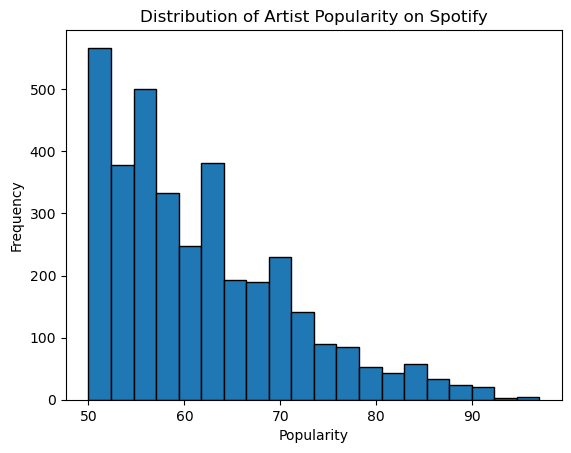

In [8]:
# Create a distribution graph of artist popularity
plt.hist(popularity_scores, bins=20, edgecolor="black")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.title("Distribution of Artist Popularity on Spotify")
plt.show()

In [9]:
average_polarity = sum(popularity_scores) / len(popularity_scores)
print("Average Polarity:", average_polarity)

Average Polarity: 61.738315141337814
